In [482]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [483]:
def frameTr(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.GaussianBlur(frame, (5, 5), 0)
    kernel = np.ones((4,4),np.float32)/27
    frame = cv2.filter2D(frame,-1,kernel)
    frame = cv2.normalize(frame,  frame, 0, 255, cv2.NORM_MINMAX)
    return frame


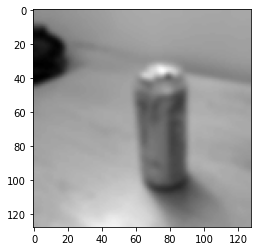

In [484]:
sample = cv2.imread("monster_test/monster/frame56.jpg")


proc_sample = frameTr(sample)
plt.imshow(cv2.cvtColor(proc_sample,cv2.COLOR_BGR2RGB))

In [485]:
def define_background(background,frame):
    """Used to create the initial background frame to later detect new objects

    Args:
        background (np.array): img that stores the background
        frame (np.array): new frame we want to add to the background.

    Returns:
        np.array: modified background, or frame if background was None.
    """
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if background is None:
        return frame.copy().astype("float")

    cv2.accumulateWeighted(frame,background,0.5)
    return background



In [486]:
def get_objs(background,frame,threshold):
    frame = frameTr(frame)
    diff = cv2.absdiff(background.astype("uint8"),frame)
    _ ,thresh = cv2.threshold(diff,threshold,255,cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) ==0:
        return None
    objs = sorted(contours,key = cv2.contourArea,reverse= True)
    print(cv2.contourArea(objs[0]))
    return (cv2.boundingRect(objs[0]),diff)


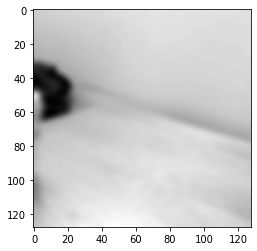

In [487]:
bg = cv2.imread("monster_test/no_monster/frame570.jpg")
bg = frameTr(bg)
bgRGB = cv2.cvtColor(bg,cv2.COLOR_BGR2RGB)
plt.imshow(bgRGB)

1428.0


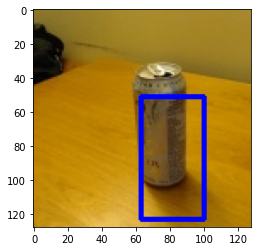

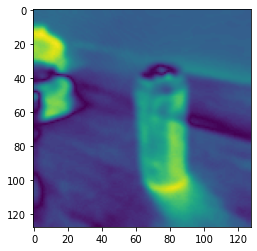

In [488]:

((x,y,w,h),diff) = get_objs(bg,sample,100)
cv2.rectangle(sample, (x,y), (x+w,y+h), (255, 0, 0), 2)

sampleRGB = cv2.cvtColor(sample,cv2.COLOR_BGR2RGB)

plt.subplot().imshow(sampleRGB)
plt.show()
plt.subplot().imshow(diff)
plt.show()
